# STATISTICS

# Hypothesis testing

libraries:
- pandas
- numpy
- scipy
- statsmodels

## 1. Parametric Criteria

### 1.1. Binominal Test

**Stress of restaurant employees**

According to the survey, 75% of restaurant employees say they experience significant stress at work that negatively affects their personal lives. A large restaurant chain polls 100 of its employees to find out if the stress level of workers in their restaurants is different from the average. 67 out of 100 workers reported high levels of stress.

_H0: the stress level of restaurant chain workers is the same as in average_

_H1: the stress level of restaurant chain workers is not the same as in average_

In [1]:
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportion_confint

In [2]:
# Level of significance achieved:

p_value = stats.binom_test(67, 100, 0.75, alternative = 'two-sided') 
round(p_value, 4)

0.0822

As p-value > 0.05, we can't reject H0 in 95% significant .

### 1.2. Chisquare 

**Spatial distribution of pines**

The Wage Tract is a nature reserve in Tom County, Georgia, USA, in which trees have not been affected by human activity since the first settlers. For the reserve area 200x200 m in size, there is information about the coordinates of the pines ('sn' is the coordinate in the north-south direction, 'we', in the west-east direction, both from 0 to 200).

In [3]:
import pandas as pd
data = pd.read_csv('pines.txt', delimiter="\t")
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


We check whether the spatial distribution of pines can be considered uniform, or whether they grow in clusters. Let's divide the area into 5x5 identical squares of 40x40 m in size and count the number of pines in each square.

_H0: trees grow evenly_

_H1: trees grow in clusters_

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'WE')

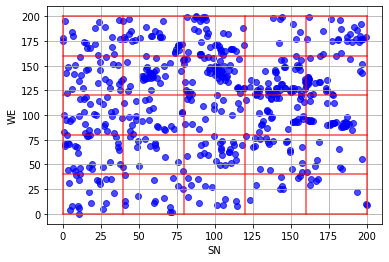

In [4]:
x = np.linspace(0, 200, 6)
y = np.linspace(0, 200, 6)
xx, yy = np.meshgrid(x, y)

%pylab inline
pylab.grid(True)
pylab.scatter(data.sn, data.we, color='b', alpha = 0.7)
pylab.plot(xx, yy, 'r-', alpha = 0.7)
pylab.plot(yy, xx, 'r-', alpha = 0.7)
xlabel('SN')
ylabel('WE')

In [5]:
ret = stats.binned_statistic_2d(data.sn, data.we, values = None, statistic = 'count', bins=5)
ret.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [6]:
freq = np.reshape(ret.statistic, 25)
freq

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

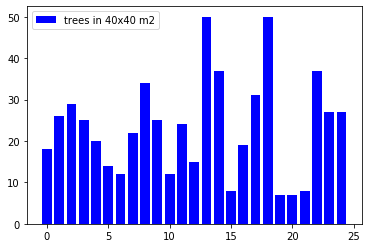

In [7]:
pylab.bar(range(25), freq, color = 'b', label = 'trees in 40x40 m2')
pylab.legend()

Average expected number of pines in each square:

In [8]:
L = freq.mean()
L

23.36

In [9]:
exp_freq = np.array([L]*25)
exp_freq

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

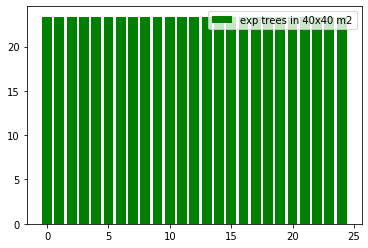

In [10]:
pylab.bar(range(25), exp_freq, color = 'g', label = 'exp trees in 40x40 m2')
pylab.legend()

In [11]:
stats.chisquare(freq, exp_freq, ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)

As a p-value < 0.05, we reject H0.

### 1.3. Z-statistic

**1) Blood calcium level**

The blood calcium level of healthy young women is on average 9.5 milligrams per deciliter and has a characteristic standard deviation of 0.4 mg/ dl. In a Guatemalan rural hospital, calcium levels were measured for 160 healthy pregnant women at the first call for pregnancy; the average value was 9.57 mg / dl. 

We will check if the average calcium level in this population is different from 9.5.

_H0: calcium level in measured population is the same as on average_

_H1: calcium level in measured population is different from average_

According to Central Limit Theorem:

standard deviation of the mean in population:
$$ SE = st/√n $$

If H0 complies, std of population = std of sample from it, then z-statistics:

$$ z = (Xmean  - mu)/ SE $$

In [12]:
# for population:
std = 0.4
mu = 9.5

# for sample
X_ = 9.57
n = 160

In [13]:
SE = std/n**0.5
z = (X_ - mu)/SE
z

2.213594362117875

In [14]:
from scipy import stats

# 2 side Alternative
p = 2*(1-stats.norm.cdf(abs(z)))
round(p, 4)

0.0269

As a p-value < 0.05, we reject H0.

95% confident interval for mean in population:
$$mu ± 2SE$$

In [15]:
print('95% confident interval for mean in population: ', mu-2*SE, mu+2*SE) 

95% confident interval for mean in population:  9.436754446796632 9.563245553203368


**2) Contagious yawning**

In one of the episodes of the Destroyers of Legends program, it was checked whether yawning is really contagious. The experiment involved 50 subjects who were interviewed for the program. Each of them spoke with a recruiter; at the end of 34 out of 50 conversations, the recruiter yawned. Then the subjects were asked to wait for the recruiter's decision in the next empty room.

While waiting, 10 out of 34 subjects in the experimental group and 4 out of 16 subjects in the control group began to yawn. Thus, the difference in the proportion of yawning people in these two groups was approximately 4.4%. The presenters concluded that the myth of the infectiousness of yawning is confirmed.

Can we say that the difference of yawning in the control and experimental groups is significant? Calculate the level of significance achieved at alternative contagiousness of yawning

_H0: There is no significant difference in the control and experimental groups_

_H1: The yawning is contagious_


Z-criteria for 2 independent samles:

$$Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [16]:
n1 = 34
n2 = 16
p1 = 10/34
p2 = 4/16

In [17]:
import numpy as np
P = float(p1*n1 + p2*n2) / (n1 + n2)
Z = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [18]:
from scipy import stats

# Alternative 'greater':
# H1: p1 > p2  
1 - stats.norm.cdf(Z)

0.37293045872523534

As a p-value > 0.05, we can not reject H0, there are no significant difference between two groups.

**3)  Training courses for GMAT**

Each year, more than 200,000 people around the world pass the standardized GMAT exam when they enroll in MBA programs. The average result is 525 points, the standard deviation is 100 points.

One hundred students have completed special training courses and pass the exam. The average score they received is 541.4. We will test the hypothesis of program inefficiency versus the one-sided alternative that the program works.

In [19]:
mu = 525.     # mean of population
std = 100.    # std of population

n = 100       # number of sample
X_ = 541.4    # mean of sample

*H0: X_ = mu     (if sample is from population)*
    
*H1: X_ > mu 'greater'    (the sample is not from population, with greater mean)*

In [20]:
SE = std/n**0.5     # standard deviation of the mean in population
z = (X_ - mu)/SE     # z-statistics
z

1.6399999999999977

In [21]:
1-stats.norm.cdf(z)    # p-value

0.05050258347410397

In this example a p-value just a little more than 0.05, however, we still can not reject H0.

# 2. Nonparametric criteria

### 2.1. Wilcoxon sign rank test

There is a data on the survival of patients with leukocyte lymphoma:

_49, 58,75, 110, 112, 132, 151, 276, 281, 362*_

The residual lifetime was measured since the start of observation (in weeks); an asterisk denotes censorship from above - the study lasted 7 years, and the remaining life time of one patient who lived to the end of the observation is unknown.

Since only one observation is censored, to test the hypothesis H0: medX = 200, criterion ranks can be used on this data - we can assume that the survival time of the last patient is exactly 362, this will not affect the rank of this observation.

By criterion of sign ranks, we will test this hypothesis versus a two-way alternative.

*H0: medianX = 200*

*H1: medianX != 200*

In [22]:
import numpy as np
from scipy import stats

In [23]:
survives = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])

In [24]:
mu0 = 200
stats.wilcoxon(survives - mu0)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

As p_value > 0.05, we can not reject H0.

### 2.2. Mann-Whitney rank test

In the study, the effect of logging on forest biodiversity of Borneo collected data on the number of tree species in 12 forests where logging is not conducted:
_22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15,_

and 9 forests where logging is:
_17, 18, 18, 15, 12, 4, 14, 15, 10._

We will use rank criterion to test the hypothesis that the average number of species is equal in two types of forests versus the one-sided alternative of reducing biodiversity in deforestation.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta)$       

In [25]:
forest1 = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15])
forest2 = np.array([17, 18, 18, 15, 12, 4, 14, 15, 10])

In [26]:
stats.mannwhitneyu(forest1, forest2, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

As p_value < 0.05, we can reject H0 in favor of alternative one-sided hypothesis of reducing biodiversity in deforestation.